<a href="https://colab.research.google.com/github/SDashev/Springboard-Capstone-2/blob/master/Capstone_2_explore_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This notebook uses google colab to run.

# Download data from Kaggle

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = 'gdrive/My Drive/Capstone 2/'

In [0]:
from google.colab import files
files.upload()

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [0]:
!kaggle datasets download  chrisfilo/fruit-recognition -p /content/gdrive/My\ Drive/kaggle/fruits

100% 7.91G/7.92G [02:05<00:00, 47.6MB/s]
100% 7.92G/7.92G [02:05<00:00, 67.5MB/s]


In [0]:
def check_memory():
  import sys

  local_vars = locals().items()
  for var, obj in local_vars:
    print(var, sys.getsizeof(obj))

## Loading data for exlporatory analysis from google drive

In [0]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# in the colab files, I created data directory and moved the working directory there.
os.chdir( 'data')

In [0]:
download = drive.CreateFile({'id': '1-0DzB-dUXarKs6GtULkZceszlyx9BcfT'})
download.GetContentFile('fruit-recognition.zip')

In [5]:

!unzip -q fruit-recognition.zip  
!ls
#print("finished!")

Apple	   fruit-recognition.zip  Mango      Peach	Pitaya	     Tomatoes
Banana	   Guava		  muskmelon  Pear	Plum
Carambola  Kiwi			  Orange     Persimmon	Pomegranate


We list the names of all images in the dataset in the file file_name.txt.

In [0]:
!ls  -R > file_names.txt

In [7]:
!rm fruit-recognition.zip
%reset_selective download

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [0]:
#who

# Explore data

We check images and names of images.

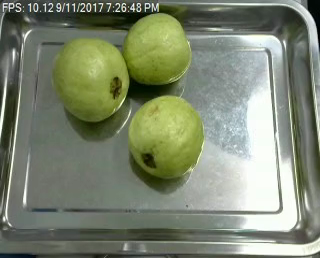

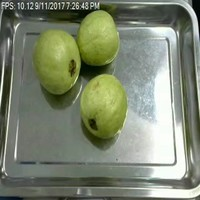

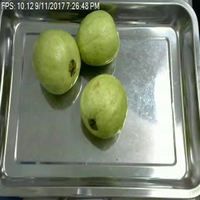

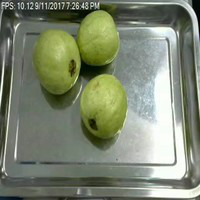

In [37]:
from IPython.display import  Image
base_path_Gu = 'Guava/Guava total/'
display(Image(filename=base_path_Gu + '1GuavaуАВ2474.png'))
display(Image(filename=base_path_Gu + '1GuavaуАВ2474 resized.jpg'))
display(Image(filename=base_path_Gu + '1GuavaуАВ2474 resized.png'))
display(Image(filename=base_path_Gu + '1GuavaуАВ2474 resized resized.png'))



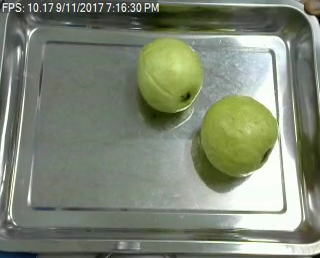

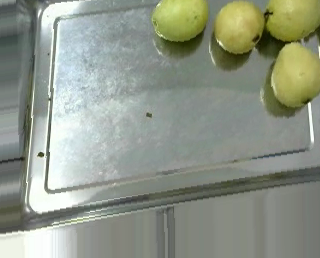

In [10]:
# what is in Guava total final?
base_path_Gu = 'Guava/guava total final/'
display(Image(filename=base_path_Gu + 'Guava01000.png'))
display(Image(filename=base_path_Gu + 'Guava0108.png'))

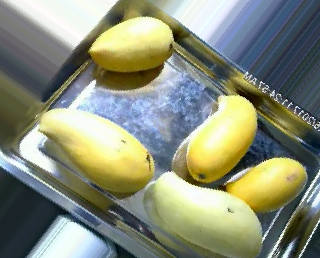

In [0]:
# Mango:
base_path_Mango = 'Mango/'
display(Image(filename=base_path_Mango + 'Mango001006.png'))
 

We check if resized images are the same.

In [0]:
import cv2
import numpy as np
def check_images(img1, img2):
  # this function checks if two images are the same
  # we need the images THE SAME SIZE!
  a = cv2.imread(img1)
  b = cv2.imread(img2)
  difference = cv2.subtract(a, b)    
  result =  np.any(difference)
  if result:
    message = 'Pictures are the same'
  else:
    message = 'Pictures are not the same'
  return message 

In [84]:
image1 = base_path_Gu + 'Guava01000.png'
image2 = base_path_Gu + 'Guava0108.png'
print(check_images(base_path_Gu + 'Guava0108.png', base_path_Gu + 'Guava0108.png'))
#print(cv2.subtract(cv2.imread(image1), cv2.imread(image2)))
image1



Pictures are not the same


'Guava/Guava total/Guava01000.png'

In [38]:
# comparing a few images
image1 = base_path_Gu + '1GuavaуАВ2474 resized.png'
image2 = base_path_Gu + '1GuavaуАВ2474 resized.jpg'
print(check_images(image1, image2))

image1 = base_path_Gu + '1GuavaуАВ2474 resized.png'
image2 = base_path_Gu + '1GuavaуАВ2475 resized.png'
print(check_images(image1, image2))

image2 =  base_path_Gu + '1GuavaуАВ2475 resized.jpg'
print(check_images(image1, image2))

image2 =  base_path_Gu + '1GuavaуАВ2484 resized.png'
image1 =  base_path_Gu + '1GuavaуАВ2476 resized.jpg'
print(check_images(image1, image2))

Pictures are not the same
Pictures are not the same
Pictures are not the same
Pictures are not the same


Reading file names to create list.

In [0]:
# read the name of images.
with open('file_names.txt', 'r') as f:
  list_of_names = f.read().splitlines()

In [0]:
#list_of_names[:20]

In [0]:
# remove extra items from list of names of files
list_remove = ['.:', 'file_names.txt', 'fruit-recognition.zip']
[list_of_names.remove(file) for file in list_remove]
list_of_names = [item for item in list_of_names if item !='']

In [0]:
# creating labels for classes.
classes = list_of_names[:15]

# remove classes from list.
del list_of_names[:15]

In [0]:
#classes

### Splitting images into resized and original size

In [0]:
resized_images = []
original_images = []
for row in list_of_names:
  if './' in row:
    resized_images.append(row)
    original_images.append(row)
  elif 'resize' in row:
    resized_images.append(row)
  else:
    original_images.append(row)

In [23]:
del resized_images[:13]
resized_images[:5]

['./Guava/Guava total:',
 '1GuavaуАВ2474 resized.jpg',
 '1GuavaуАВ2474 resized.png',
 '1GuavaуАВ2474 resized resized.png',
 '1GuavaуАВ2475 resized.jpg']

In [92]:
image1 =  base_path_Gu + '1GuavaуАВ2474 resized resized.png'
print(Image.open(image1).size)

(200, 200)


In [0]:
# removing top level of directories from list of files.
list_to_delete = ['./Apple:', 'Apple A', 'Apple B', 'Apple C','Apple D', 
                  'Apple E', 'Apple F', 'Total Number of Apples', 
                  './Guava:', 'Guava total', 'guava A', 'guava B',
                  'guava total final', './Kiwi:',
                  'Kiwi B', 'Kiwi C', 'Total Number of Kiwi fruit',
                  'kiwi A']
for name in list_to_delete:
  original_images.remove(name)

In [25]:
# what type of fruits have resized images are there?
#resized_images.remove('./sample_data:')
for row in resized_images:
  if './' in row:
    print(row)

./Guava/Guava total:
./Guava/guava total final:
./Kiwi:
./Kiwi/kiwi A:
./Kiwi/Kiwi B:
./Kiwi/Kiwi C:
./Kiwi/Total Number of Kiwi fruit:
./Mango:
./muskmelon:
./Orange:
./Peach:
./Pear:
./Persimmon:
./Pitaya:
./Plum:
./Pomegranate:
./Tomatoes:


Not all classes have resized images. The classes missing these are Apple, Banana, Carambola, Guava.

In [26]:
for row in original_images:
  if './' in row:
    print(row)

./Apple/Apple A:
./Apple/Apple B:
./Apple/Apple C:
./Apple/Apple D:
./Apple/Apple E:
./Apple/Apple F:
./Apple/Total Number of Apples:
./Banana:
./Carambola:
./Guava/guava A:
./Guava/guava B:
./Guava/Guava total:
./Guava/guava total final:
./Kiwi/kiwi A:
./Kiwi/Kiwi B:
./Kiwi/Kiwi C:
./Kiwi/Total Number of Kiwi fruit:
./Mango:
./muskmelon:
./Orange:
./Peach:
./Pear:
./Persimmon:
./Pitaya:
./Plum:
./Pomegranate:
./Tomatoes:


### Creating lists

In [0]:
def create_label(name):
  label = name[2:]
  label = label[:-1]
  return label.split('/')[0]

In [0]:
# creating paths to files and class labels.
base_path = ''
image_path_label = []
for row in original_images:
  start_with = row[:2]
  if start_with == './':
    base_path = row[2:]
    base_path = base_path[:-1]
    base_path += '/'
    label_name = create_label(row)
  else:
    image_path_label.append((base_path + row, label_name))


In [0]:
def unzip(list_tuples):
  '''
  This function takes the tuples created in cell above and separates the path 
  to file and the label of the image.
  '''
  return [ x for x, y in list_tuples], [y for x, y in list_tuples]


Additional filtering of images that are different size.

In [89]:
# different size images
import cv2
from PIL import Image
files_diff_size = []
list_files, label_name = unzip(image_path_label)
length, width = Image.open(list_files[0]).size
for (file, label) in image_path_label:
  image = Image.open(file)
  len_image = image.size[0]
  width_image = image.size[1]
  if len_image == length and width_image == width:
    files_diff_size.append((file, label))


print(len(files_diff_size))
Image.open(files_diff_size[0][0]).size

6501


(480, 322)

In [31]:
import cv2
from PIL import Image
files_smaller_size = []
length, width = 320, 258
for (file, label) in image_path_label:
  image = Image.open(file)
  len_image = image.size[0]
  width_image = image.size[1]
  if len_image == length and width_image ==width:
    files_smaller_size.append((file, label))

print(len(files_smaller_size))
Image.open(files_smaller_size[0][0]).size

54633


(320, 258)

In [32]:
Image.open('Apple/Total Number of Apples/Apple 03100.jpg').size

(320, 240)

Only one image is not size of (320, 258) or (480, 322).

In [0]:
len(image_path_label)

61135

In the dataset, the images are at least 4 different sizes: (480, 322), (320, 258), (320, 240) and (200, 200).

Images not having "resized" in their name are 61135. From these, 6501 are larger and 54633 are regular size. 

We will use the regular size images for teaching classifier to recognize fruits.

### Exploratory analysis

In [0]:
import numpy as np
import pandas as pd
import seaborn as sn
from PIL import Image

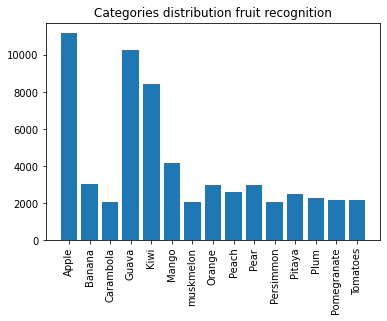

In [35]:
import matplotlib.pyplot as plt
from collections import Counter
X, y = unzip(image_path_label)
y_count = Counter(y)
plt.bar(y_count.keys(), y_count.values())
plt.xticks(rotation='vertical')
plt.title('Categories distribution fruit recognition')
plt.show()

The classes Apple, Guava and Kiwi have the most values. All other classes have less values.

### Splitting data and preparing train and test

In [0]:
# creating labels
import pandas as pd

label_classes = pd.DataFrame(classes,columns=['Fruit names']).astype('category')
label_classes['Fruit name cat'] = label_classes['Fruit names'].cat.codes
label_classes = label_classes.set_index('Fruit names')
label_classes.to_csv('label_classes.csv')

In [0]:
# created one_hot_encode labels from set labels
file_paths, label_class = unzip(files_smaller_size)
np.save('file_names_data.npy', file_paths)

import keras
from keras.utils import to_categorical

#y_label_one_hot = to_categorical(label_class)
y_label = []
for row in label_class:
  y_label.append(label_classes.loc[row]['Fruit name cat'])
df_y_label = pd.DataFrame(y_label)
y_label_one_hot = to_categorical(df_y_label)
np.save('y_label_one_hot.npy', y_label_one_hot)
#y_label_one_hot

In [0]:

from sklearn.utils import shuffle

filenames_shuffled, y_labels_one_hot_shuffled = shuffle(
    file_paths, y_label_one_hot, random_state=56)



# saving the shuffled file.

np.save('y_labels_one_hot_shuffled.npy', y_labels_one_hot_shuffled)

np.save('filenames_shuffled.npy', filenames_shuffled)

## Splitting data train_test_split and saving lists for machine learning

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
filenames_shuffled_numpy = np.array(filenames_shuffled)


X_train_filenames, X_val_filenames, y_train, y_val = train_test_split(
                filenames_shuffled_numpy, y_labels_one_hot_shuffled, test_size=
                0.1, random_state=1)

print(X_train_filenames.shape) 
print(y_train.shape)           

print(X_val_filenames.shape)   
print(y_val.shape)           


np.save('X_train_filenames.npy', X_train_filenames)
np.save('y_train.npy', y_train)

np.save('X_val_filenames.npy', X_val_filenames)
np.save('y_val.npy', y_val)

(49169,)
(49169, 15)
(5464,)
(5464, 15)
